# Compare simulated and observed data for Col de la Porte site
 ---
**Description:** this script will compare simulated and observed data for Col de la Porte test site (France)

**Author:** Elisa Bortoli (elisa.bortoli@eurac.edu)

**Credits:** Giacomo Bertoldi (giacomo.bertoldi@eurac.edu)

**Date:** 2019-07-23

**Version:** 1.0

**Usage:** simple run

**Python version:** 3.6.8

**Requirements:** Python modules: os, glob, sys, pandas, numpy, matplotlib, netCDF4
 
 **Notes:** 
 - The test setup can be found at:
https://github.com/geotopmodel/geotop/tree/v3.0/tests/1D/ColdelaPorte


 - Infos about all the measured data can be found at:
http://doi.osug.fr/public/CRYOBSCLIM_CDP/CRYOBSCLIM.CDP.2018.html


- The measured data used are those of CRYOBSCLIM.CDP.2018.HourlySnow.zip that can be found at:
http://doi.osug.fr/data/public/CRYOBSCLIM_CDP/

## Import the necessary modules

In [1]:
import os 
import glob 
import sys
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import netCDF4

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
// avoid output into scrollable frames

<IPython.core.display.Javascript object>

In [3]:
#%matplotlib notebook

## Set the simulation path

In [4]:
data_simulated = r"/home/elisa/paper_GEOtop/tests/ColdelaPorte/data_simulated"
sim_path = data_simulated + r"/sim_4"
sim_path

'/home/elisa/paper_GEOtop/tests/ColdelaPorte/data_simulated/sim_4'

## Load data
### Observed data 
### (a) CDP\_hourly_*.nc


In [5]:
obs_path = sim_path + "/obs"
observed_data = netCDF4.Dataset(obs_path+'/CDP_hourly_19930801_20170731.nc')

# Print variables
print("observed_data.variables.keys() = \n", observed_data.variables.keys(), "\n")

observed_data.variables.keys() = 
 odict_keys(['time', 'Soil_temperature_10cm', 'Soil_temperature_20cm', 'Soil_temperature_50cm', 'Runoff_5m2', 'Runoff_1m2', 'Snow_depth', 'Surface_temperature', 'Ground_flux_1', 'Ground_flux_2', 'Ground_flux_3', 'Settling_disks_height_1', 'Settling_disks_height_2', 'Settling_disks_height_3', 'Settling_disks_height_4', 'Settling_disks_height_5', 'Settling_disks_height_6', 'Settling_disks_height_7', 'Settling_disks_height_8', 'Settling_disks_height_9', 'Settling_disks_height_10', 'Settling_disks_height_11', 'Settling_disks_height_12', 'Settling_disks_height_13', 'Settling_disks_height_14', 'Settling_disks_height_15', 'Settling_disks_height_16', 'Settling_disks_height_17', 'Settling_disks_height_18', 'Settling_disks_height_19', 'Settling_disks_height_20', 'Settling_disks_temp_1', 'Settling_disks_temp_2', 'Settling_disks_temp_3', 'Settling_disks_temp_4', 'Settling_disks_temp_5', 'Settling_disks_temp_6', 'Settling_disks_temp_7', 'Settling_disks_temp_8', 'Se

In [6]:
# # Explore data
# print(observed_data.variables['time'])
# print(" ------------------------------------------------------------------------------------------------ ")
# print(observed_data.variables['Snow_depth'])
# print(" ------------------------------------------------------------------------------------------------ ")
# print(observed_data.variables['Surface_temperature'])
# print(" ------------------------------------------------------------------------------------------------ ")
# print(observed_data.variables['Soil_temperature_10cm'])
# print(" ------------------------------------------------------------------------------------------------ ")
# print(observed_data.variables['Soil_temperature_20cm'])
# print(" ------------------------------------------------------------------------------------------------ ")
# print(observed_data.variables['Soil_temperature_50cm'])

In [7]:
# Read the variables
time_s     = observed_data.variables['time']
HS_cm      = observed_data.variables['Snow_depth']
Tsurface_K = observed_data.variables['Surface_temperature']
Tsoil10_K  = observed_data.variables['Soil_temperature_10cm']
Tsoil20_K  = observed_data.variables['Soil_temperature_20cm']
Tsoil50_K  = observed_data.variables['Soil_temperature_50cm']

Tsurface_K

<class 'netCDF4._netCDF4.Variable'>
float64 Surface_temperature(time)
    _FillValue: -9999999.0
    units: K
unlimited dimensions: time
current shape = (210384,)
filling on

In [8]:
# Manipulate variables values
HS_mm      = HS_cm[:]*10
Tsurface_C = Tsurface_K[:]-273.15
Tsoil10_C  = Tsoil10_K[:]-273.15
Tsoil20_C  = Tsoil20_K[:]-273.15
Tsoil50_C  = Tsoil50_K[:]-273.15

Tsurface_C

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=-9999999.0)

In [9]:
# Convert the variable "time" in "numpy.ndarray"
ds_datetime = netCDF4.num2date(time_s[:],time_s.units)

ds_start = netCDF4.num2date(time_s[0],time_s.units)
ds_stop  = netCDF4.num2date(time_s[-1],time_s.units)

print("ds_start = ", ds_start)
print("ds_stop  = ", ds_stop)
print("len(ds_datetime) = ",len(ds_datetime))

ds_start =  1993-08-01 00:00:00
ds_stop  =  2017-07-31 23:00:00
len(ds_datetime) =  210384


## Create the dataframe

In [10]:
dataset = pd.DataFrame({'Date':ds_datetime[:], 'HS_mm':HS_mm, 'Tsurface_C':Tsurface_C, 
                       'Tsoil10_C':Tsoil10_C, 'Tsoil20_C':Tsoil20_C, 'Tsoil50_C':Tsoil50_C})

dataset = dataset.set_index('Date')
    
print("len(dataset) = ", len(dataset))
print("start = ", dataset.index.min())
print("end   = ", dataset.index.max())
dataset.head()

obs_dataset = dataset.to_csv("obs_dataset.txt", sep=',',index=True)

len(dataset) =  210384
start =  1993-08-01 00:00:00
end   =  2017-07-31 23:00:00


## Resample at daily time scale

In [11]:
#dataset = dataset.resample('D').mean()

print("len(dataset) = ", len(dataset))
print("start = ", dataset.index.min())
print("end   = ", dataset.index.max())
dataset.head()

len(dataset) =  210384
start =  1993-08-01 00:00:00
end   =  2017-07-31 23:00:00


,HS_mm,Tsurface_C,Tsoil10_C,Tsoil20_C,Tsoil50_C
Date,,,,,
1993-08-01 00:00:00,NaN,NaN,16.80,16.98,15.50
1993-08-01 01:00:00,NaN,NaN,16.56,16.87,15.50
1993-08-01 02:00:00,NaN,NaN,16.40,16.76,15.51
1993-08-01 03:00:00,NaN,NaN,16.17,16.63,15.50
1993-08-01 04:00:00,NaN,NaN,15.82,16.53,15.50


## Select time interval for the analysis

In [12]:
# Select time period
ref_start = '2001-09-21 00:00'
ref_end   = '2002-04-10 00:00'

In [13]:
# Select a data subset for the chosen period (observations)
dataset = dataset[(dataset.index >= ref_start) & (dataset.index <= ref_end)]

print("len(dataset) = ", len(dataset))
print("start = ", dataset.index.min())
print("end   = ", dataset.index.max())
dataset.head()

len(dataset) =  4825
start =  2001-09-21 00:00:00
end   =  2002-04-10 00:00:00


,HS_mm,Tsurface_C,Tsoil10_C,Tsoil20_C,Tsoil50_C
Date,,,,,
2001-09-21 00:00:00,0.0,NaN,8.80,9.36,10.00
2001-09-21 01:00:00,0.0,NaN,8.77,9.35,10.00
2001-09-21 02:00:00,0.0,NaN,8.75,9.35,10.01
2001-09-21 03:00:00,0.0,NaN,8.71,9.34,10.01
2001-09-21 04:00:00,0.0,NaN,8.62,9.33,10.01


### Simulated data 
### (a) surface.txt 

In [14]:
# Read in list of files
surface_path = sim_path + r"/output-tabs/"

# Select only point0*.txt files
os.chdir(surface_path)
unsorted_surface_files = glob.glob("surface*.txt")

# Sort in alphabetical order files
surface_files = sorted(unsorted_surface_files, key=str.lower)

# Imports files into pandas dataframe
surface_data = []
for j,trace in enumerate(surface_files):
    filepath = os.path.join(surface_path, trace)
    traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date12[DDMMYYYYhhmm]'], # Date format is correct
                                index_col = ['Date12[DDMMYYYYhhmm]'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999']) # NaN 
    # Resample at daily time scale
#    traces_series = traces_series.resample('D').mean()
    
    # Select a data subset for the chosen period (model)
    traces_series = traces_series[(traces_series.index >= ref_start) & (traces_series.index <= ref_end)]
    
    # Append
    surface_data.append(traces_series)
    
# View all the columns headers
print(list(traces_series), "\n")

# Print useful infos
print("len(traces_series) = ", len(traces_series))
print("start = ", traces_series.index.min())
print("end   = ", traces_series.index.max())
traces_series.head()

['JulianDayFromYear0[days]', 'TimeFromStart[days]', 'Simulation_Period', 'Run', 'IDpoint', 'Psnow_over_canopy[mm]', 'Prain_over_canopy[mm]', 'Psnow_under_canopy[mm]', 'Prain_under_canopy[mm]', 'Prain_rain_on_snow[mm]', 'Wind_speed[m/s]', 'Wind_direction[deg]', 'Relative_Humidity[-]', 'Pressure[mbar]', 'Tair[C]', 'Tdew[C]', 'Tsurface[C]', 'Tvegetation[C]', 'Tcanopyair[C]', 'Surface_Energy_balance[W/m2]', 'Soil_heat_flux[W/m2]', 'SWin[W/m2]', 'SWbeam[W/m2]', 'SWdiff[W/m2]', 'LWin[W/m2]', 'LWin_min[W/m2]', 'LWin_max[W/m2]', 'SWnet[W/m2]', 'LWnet[W/m2]', 'H[W/m2]', 'LE[W/m2]', 'Canopy_fraction[-]', 'LSAI[m2/m2]', 'z0veg[m]', 'd0veg[m]', 'Estored_canopy[W/m2]', 'SWv[W/m2]', 'LWv[W/m2]', 'Hv[W/m2]', 'LEv[W/m2]', 'Hg_unveg[W/m2]', 'LEg_unveg[W/m2]', 'Hg_veg[W/m2]', 'LEg_veg[W/m2]', 'Evap_surface[mm]', 'Trasp_canopy[mm]', 'Water_on_canopy[mm]', 'Snow_on_canopy[mm]', 'Qvegetation[-]', 'Qsurface[-]', 'Qair[-]', 'Qcanopyair[-]', 'LObukhov[m]', 'LObukhovcanopy[m]', 'Wind_speed_top_canopy[m/s]', 'D

,JulianDayFromYear0[days],TimeFromStart[days],Simulation_Period,Run,IDpoint,Psnow_over_canopy[mm],Prain_over_canopy[mm],Psnow_under_canopy[mm],Prain_under_canopy[mm],Prain_rain_on_snow[mm],...,glac_depth[mm],glac_water_equivalent[mm],glac_density[kg/m3],glac_temperature[C],glac_melted[mm],glac_subl[mm],lowest_thawed_soil_depth[mm],highest_thawed_soil_depth[mm],lowest_water_table_depth[mm],highest_water_table_depth[mm]
Date12[DDMMYYYYhhmm],,,,,,,,,,,,,,,,,,,,,
2001-09-21 01:00:00,731115.041667,0.041667,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6558.0,0.000000,500.000000,500.000000
2001-09-21 02:00:00,731115.083333,0.083333,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6558.0,0.000000,500.000000,500.000000
2001-09-21 03:00:00,731115.125000,0.125000,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6558.0,0.000000,500.000000,500.000000
2001-09-21 04:00:00,731115.166667,0.166667,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6558.0,0.000000,500.000000,500.000000
2001-09-21 05:00:00,731115.208333,0.208333,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6558.0,0.026126,500.123884,500.123884


### (b) ground.txt

In [15]:
# Read in list of files
ground_path = sim_path + r"/output-tabs/"

# Select only point0*.txt files
os.chdir(ground_path)
unsorted_ground_files = glob.glob("ground*.txt")

# Sort in alphabetical order files
ground_files = sorted(unsorted_ground_files, key=str.lower)

# Imports files into pandas dataframe
ground_data = []
for j,trace in enumerate(ground_files):
    filepath = os.path.join(ground_path, trace)
    traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date12[DDMMYYYYhhmm]'], # Date format is correct
                                index_col = ['Date12[DDMMYYYYhhmm]'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999']) # NaN 
    
     # Resample at daily time scale
#    traces_series = traces_series.resample('D').mean()
    
    # Select a data subset for the chosen period (model)
    traces_series = traces_series[(traces_series.index >= ref_start) & (traces_series.index <= ref_end)]
    
    # Append
    ground_data.append(traces_series)
    
# Print useful infos
print("len(traces_series) = ", len(traces_series))
print("start = ", traces_series.index.min())
print("end   = ", traces_series.index.max())
traces_series.head()

len(traces_series) =  4825
start =  2001-09-21 00:00:00
end   =  2002-04-10 00:00:00


,JulianDayFromYear0[days],TimeFromStart[days],Simulation_Period,Run,IDpoint,100.000000,200.000000,500.000000
Date12[DDMMYYYYhhmm],,,,,,,,
2001-09-21 00:00:00,731115.000000,0.000000,0,1,1,1.000000,1.000000,1.000000
2001-09-21 01:00:00,731115.041667,0.041667,1,1,1,1.071664,1.010976,1.000241
2001-09-21 02:00:00,731115.083333,0.083333,1,1,1,1.129305,1.027884,1.000839
2001-09-21 03:00:00,731115.125000,0.125000,1,1,1,1.058903,1.029621,1.001439
2001-09-21 04:00:00,731115.166667,0.166667,1,1,1,0.923003,1.010270,1.001579


## Plot Simulated vs Observed data

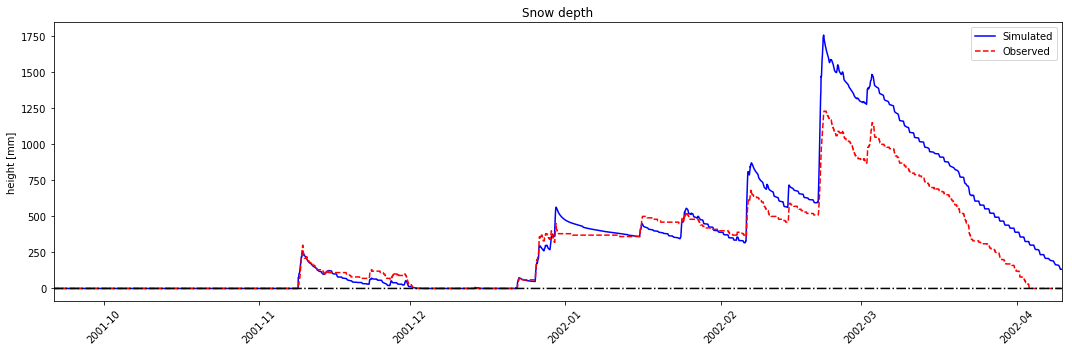

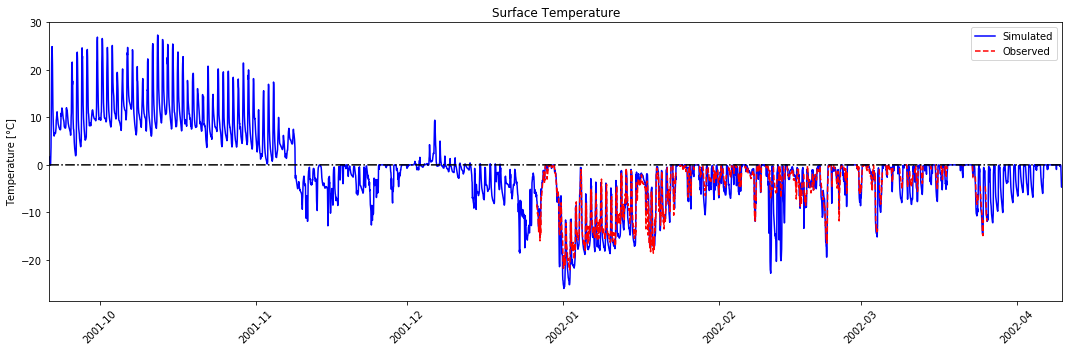

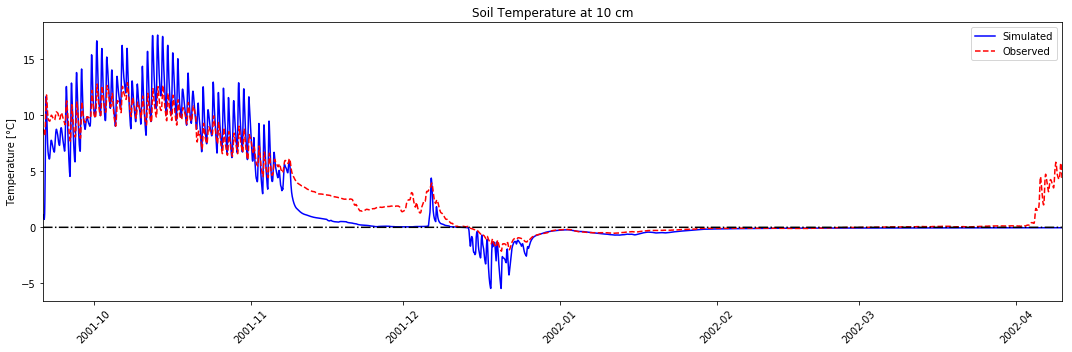

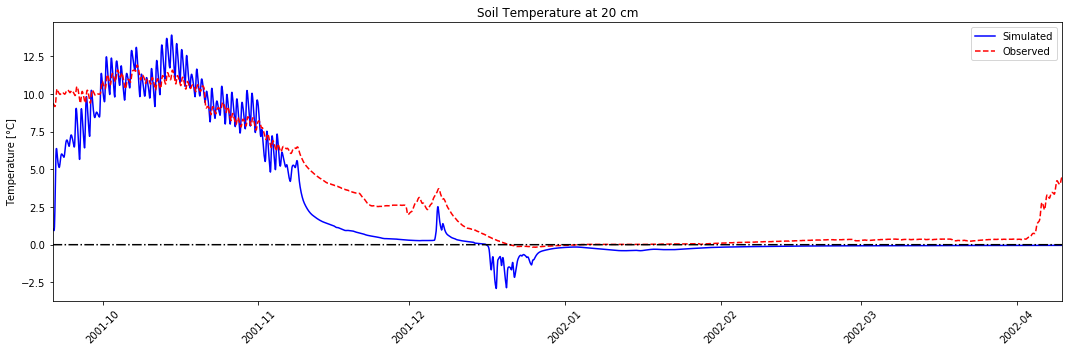

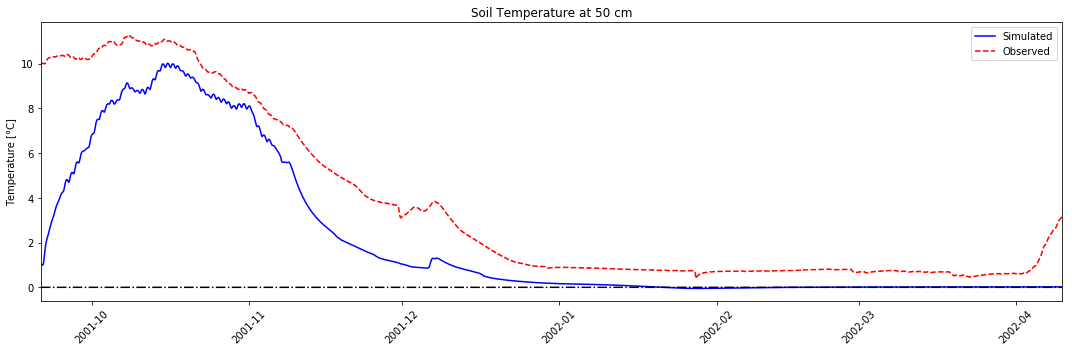

In [16]:
for i in range(0,len(surface_files)):
    surfacedata = surface_data[i]
    grounddata = ground_data[i]
# -------------------------------------------------------------------------------------------------------    
    plt.figure(figsize = (15,5))
    plt.plot(surfacedata.index, surfacedata['snow_depth[mm]'], color='blue')
    plt.plot(dataset.index, dataset['HS_mm'], color='red', linestyle='--')
    plt.plot(dataset.index, np.zeros(len(dataset)), color='black', linestyle='-.')
    plt.xticks(rotation=45)
    plt.xlim(dataset.index.min(), dataset.index.max())
    plt.legend(['Simulated','Observed']) 
    plt.ylabel("height [mm]")
    plt.title("Snow depth")
    plt.tight_layout()
    plt.savefig("Hsnow.png")
    plt.show();
# -------------------------------------------------------------------------------------------------------    
    plt.figure(figsize = (15,5))
    plt.plot(surfacedata.index, surfacedata['Tsurface[C]'], color='blue')
    plt.plot(dataset.index, dataset['Tsurface_C'], color='red', linestyle='--')
    plt.plot(dataset.index, np.zeros(len(dataset)), color='black', linestyle='-.')
    plt.xticks(rotation=45)
    plt.xlim(dataset.index.min(), dataset.index.max())
    plt.legend(['Simulated','Observed']) 
    plt.ylabel("Temperature [°C]")
    plt.title("Surface Temperature")
    plt.tight_layout()
    plt.savefig("Tsurface.png")
    plt.show();
# -------------------------------------------------------------------------------------------------------  
    plt.figure(figsize = (15,5))
    plt.plot(grounddata.index, grounddata['100.000000'], color='blue')
    plt.plot(dataset.index, dataset['Tsoil10_C'], color='red', linestyle='--')
    plt.plot(dataset.index, np.zeros(len(dataset)), color='black', linestyle='-.')
    plt.xticks(rotation=45)
    plt.xlim(dataset.index.min(), dataset.index.max())
    plt.legend(['Simulated','Observed']) 
    plt.ylabel("Temperature [°C]")
    plt.title("Soil Temperature at 10 cm")
    plt.tight_layout()
    plt.savefig("Tsoil10cm.png")
    plt.show();
# -------------------------------------------------------------------------------------------------------    
    plt.figure(figsize = (15,5))
    plt.plot(grounddata.index, grounddata['200.000000'], color='blue')
    plt.plot(dataset.index, dataset['Tsoil20_C'], color='red', linestyle='--')
    plt.plot(dataset.index, np.zeros(len(dataset)), color='black', linestyle='-.')
    plt.xticks(rotation=45)
    plt.xlim(dataset.index.min(), dataset.index.max())
    plt.legend(['Simulated','Observed']) 
    plt.ylabel("Temperature [°C]")
    plt.title("Soil Temperature at 20 cm")
    plt.tight_layout()
    plt.savefig("Tsoil20cm.png")
    plt.show();
# -------------------------------------------------------------------------------------------------------    
    plt.figure(figsize = (15,5))
    plt.plot(grounddata.index, grounddata['500.000000 '], color='blue')
    plt.plot(dataset.index, dataset['Tsoil50_C'], color='red', linestyle='--')
    plt.plot(dataset.index, np.zeros(len(dataset)), color='black', linestyle='-.')
    plt.xticks(rotation=45)
    plt.xlim(dataset.index.min(), dataset.index.max())
    plt.legend(['Simulated','Observed']) 
    plt.ylabel("Temperature [°C]")
    plt.title("Soil Temperature at 50 cm")
    plt.tight_layout()
    plt.savefig("Tsoil50cm.png")
    plt.show();
# -------------------------------------------------------------------------------------------------------    
#plt.close('all')

## Load meteo data

In [17]:
# Read in list of files
meteo_path = sim_path + r"/meteo/"

# Select only point0*.txt files
os.chdir(meteo_path)
unsorted_meteo_files = glob.glob("meteo*.txt")

# Sort in alphabetical order files
meteo_files = sorted(unsorted_meteo_files, key=str.lower)


# Select only point0*.txt files
os.chdir(meteo_path)
unsorted_meteo_files = glob.glob("meteo*.txt")

# Sort in alphabetical order files
meteo_files = sorted(unsorted_meteo_files, key=str.lower)

# Imports files into pandas dataframe
meteo_appended_data = []
for j,trace in enumerate(meteo_files):
    filepath = os.path.join(meteo_path, trace)
    meteo_traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date'], # Date format is correct
                                index_col = ['Date'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999999']) # NaN 
    
    # Resample at daily time scale
#    meteo_traces_series = meteo_traces_series.resample('D').mean()
    
    # Select a data subset for the chosen period (model)
    meteo_traces_series = meteo_traces_series[(meteo_traces_series.index >= ref_start) & (meteo_traces_series.index <= ref_end)]
    
    # Append
    meteo_appended_data.append(meteo_traces_series)
    
# Print useful infos
print("len(traces_series) = ", len(meteo_traces_series))
print("start = ", meteo_traces_series.index.min())
print("end   = ", meteo_traces_series.index.max())
meteo_traces_series.head()

len(traces_series) =  4825
start =  2001-09-21 00:00:00
end   =  2002-04-10 00:00:00


,Prec,Ws,RH,Tair,SW,LW
Date,,,,,,
2001-09-21 00:00:00,0.00000,0.6,87.709978,8.48,0.0,328.333
2001-09-21 01:00:00,0.98532,1.2,97.838958,7.11,0.0,351.389
2001-09-21 02:00:00,0.00000,0.4,97.805567,7.06,0.0,341.944
2001-09-21 03:00:00,0.00000,0.4,94.735807,6.69,0.0,326.111
2001-09-21 04:00:00,0.00000,0.3,92.693283,6.14,0.0,288.056


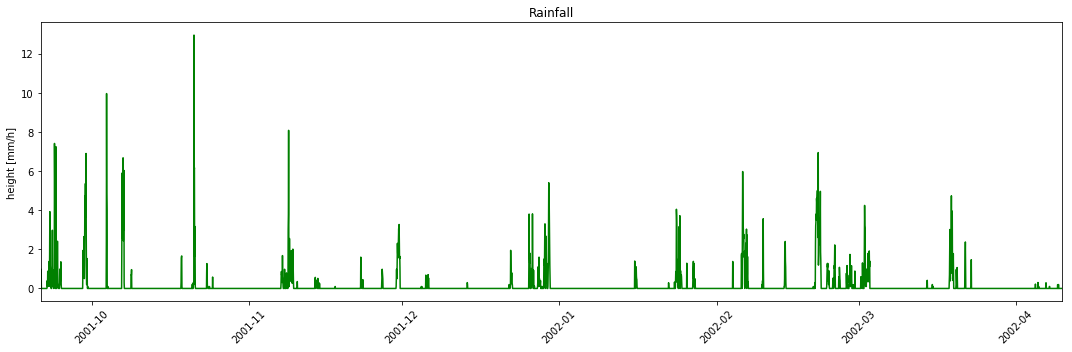

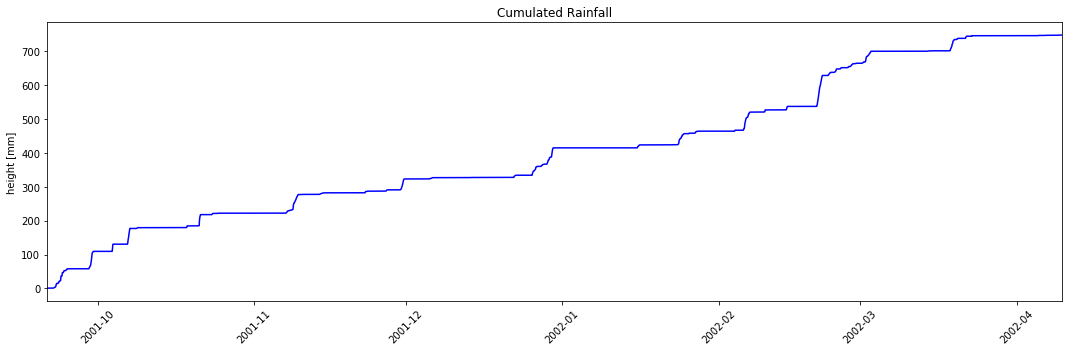

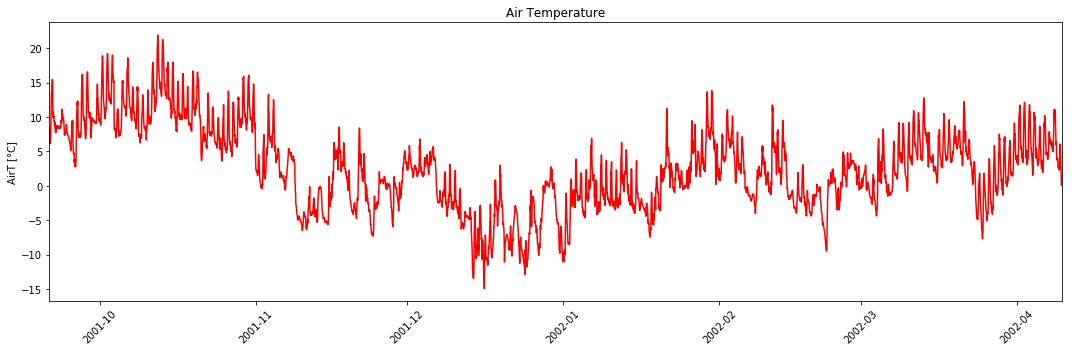

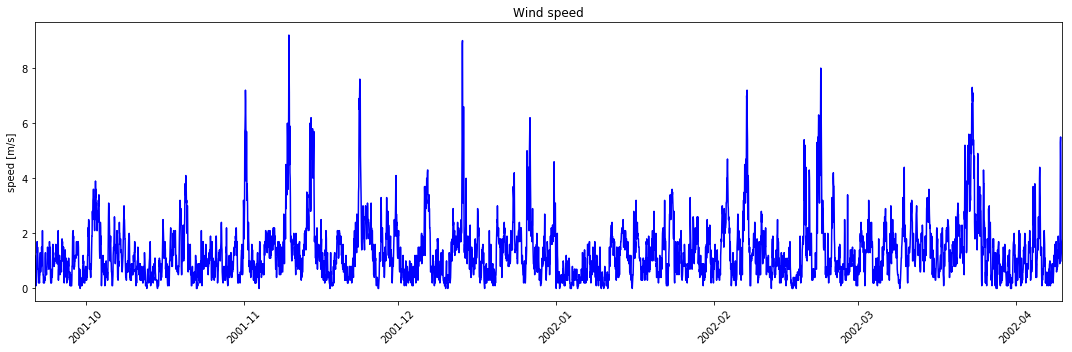

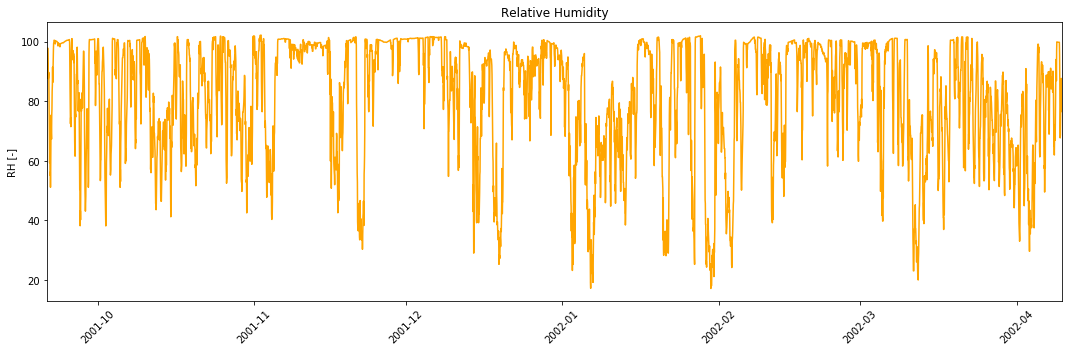

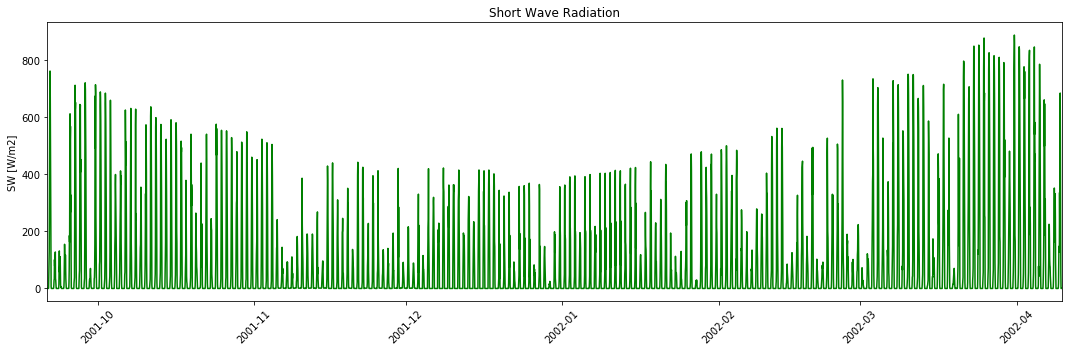

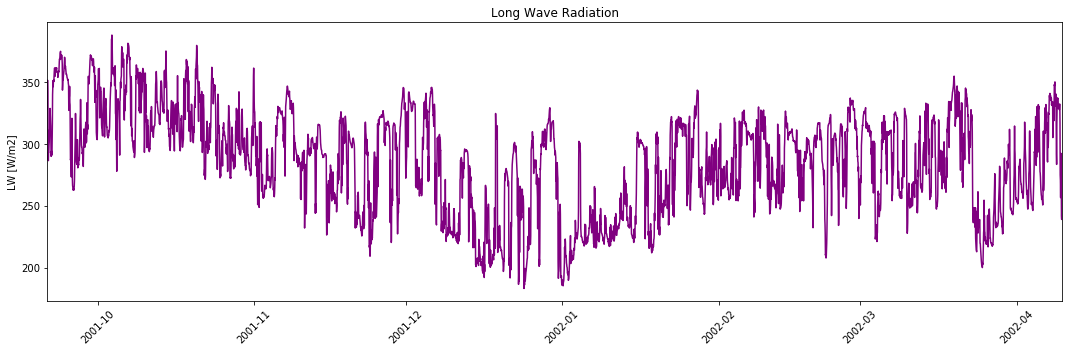

In [18]:
# Plot the desired parameter
for i in range(0,len(meteo_files)):
    meteo_mydata = meteo_appended_data[i]
    
    if 'Prec' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['Prec'], color = 'green')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Rainfall")
        plt.ylabel("height [mm/h]")
        plt.tight_layout()
        plt.show();
    # -----------------------------------------------------------------------------------------------
    if 'Prec' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['Prec'].cumsum(), color = 'blue')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Cumulated Rainfall")
        plt.ylabel("height [mm]")
        plt.tight_layout()
        plt.show();
    # -----------------------------------------------------------------------------------------------
    if 'Tair' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['Tair'], color = 'red')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Air Temperature")
        plt.ylabel("AirT [°C]")
        plt.tight_layout()
        plt.show();
    # -----------------------------------------------------------------------------------------------
    if 'Ws' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['Ws'], color = 'blue')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Wind speed")
        plt.ylabel("speed [m/s]")
        plt.tight_layout()
        plt.show();
    # -----------------------------------------------------------------------------------------------
    if 'RH' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['RH'], color = 'orange')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Relative Humidity")
        plt.ylabel("RH [-]")
        plt.tight_layout()
        plt.show();
    # -----------------------------------------------------------------------------------------------
    if 'SW' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['SW'], color = 'green')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Short Wave Radiation")
        plt.ylabel("SW [W/m2]")
        plt.tight_layout()
        plt.show();
        # -----------------------------------------------------------------------------------------------
    if 'LW' in meteo_mydata.columns:
        plt.figure(figsize = (15,5))
        plt.plot(meteo_mydata.index, meteo_mydata['LW'], color = 'purple')
        plt.xticks(rotation=45)
        plt.xlim(dataset.index.min(), dataset.index.max())
        plt.title("Long Wave Radiation")
        plt.ylabel("LW [W/m2]")
        plt.tight_layout()
        plt.show();
#plt.close('all')

In [19]:
# # Read in list of files
# point_path = sim_path + r"/output-tabs/"

# # Select only point0*.txt files
# os.chdir(point_path)
# unsorted_point_files = glob.glob("surface*.txt")

# # Sort in alphabetical order files
# point_files = sorted(unsorted_point_files, key=str.lower)

# # Imports files into pandas dataframe
# output_appended_data = []
# for j,trace in enumerate(point_files):
#     filepath = os.path.join(point_path, trace)
#     output_traces_series = pd.read_csv(filepath,
#                                 parse_dates = ['Date12[DDMMYYYYhhmm]'], # Date format is correct
#                                 index_col = ['Date12[DDMMYYYYhhmm]'], # No more element indexes
#                                 dayfirst = True, # Coherent date format
#                                 na_values=['-9999']) # NaN 
#     output_appended_data.append(output_traces_series)

In [20]:
# # Plot the desired parameter
# for i in range(0,len(meteo_files)):
#     meteo_mydata = meteo_appended_data[i]
#     output_mydata = output_appended_data[i]
#     # -----------------------------------------------------------------------------------------------
#     if 'Tair' in meteo_mydata.columns:
#         plt.figure(figsize = (15,5))
#         #plt.plot(meteo_mydata.index, meteo_mydata['Tair'], color = 'red')
#         plt.plot(output_mydata['Tair[C]']-meteo_mydata['Tair'][0:len(meteo_mydata)], 
#                  color = 'black', linestyle='--')
#         plt.xticks(rotation=45)
#         plt.title("Air Temperature")
#         plt.ylabel("AirT [°C]")
#         plt.tight_layout()
#         plt.show()
# plt.close('all')